In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('cardekho_dataset.csv')

In [69]:
df.describe()

,Unnamed: 0,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15411.000000,15411.000000,1.541100e+04,15411.000000,15411.000000,15411.000000,15411.000000,1.541100e+04
mean,9811.857699,6.036338,5.561648e+04,19.701151,1486.057751,100.588254,5.325482,7.749711e+05
std,5643.418542,3.013291,5.161855e+04,4.171265,521.106696,42.972979,0.807628,8.941284e+05
min,0.000000,0.000000,1.000000e+02,4.000000,793.000000,38.400000,0.000000,4.000000e+04
25%,4906.500000,4.000000,3.000000e+04,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,9872.000000,6.000000,5.000000e+04,19.670000,1248.000000,88.500000,5.000000,5.560000e+05
75%,14668.500000,8.000000,7.000000e+04,22.700000,1582.000000,117.300000,5.000000,8.250000e+05
max,19543.000000,29.000000,3.800000e+06,33.540000,6592.000000,626.000000,9.000000,3.950000e+07


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         15411 non-null  int64  
 1   car_name           15411 non-null  object 
 2   brand              15411 non-null  object 
 3   model              15411 non-null  object 
 4   vehicle_age        15411 non-null  int64  
 5   km_driven          15411 non-null  int64  
 6   seller_type        15411 non-null  object 
 7   fuel_type          15411 non-null  object 
 8   transmission_type  15411 non-null  object 
 9   mileage            15411 non-null  float64
 10  engine             15411 non-null  int64  
 11  max_power          15411 non-null  float64
 12  seats              15411 non-null  int64  
 13  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 1.6+ MB


In [71]:
na_mask = df.isna()
print(na_mask)

       Unnamed: 0  car_name  brand  model  vehicle_age  km_driven  \
0           False     False  False  False        False      False   
1           False     False  False  False        False      False   
2           False     False  False  False        False      False   
3           False     False  False  False        False      False   
4           False     False  False  False        False      False   
...           ...       ...    ...    ...          ...        ...   
15406       False     False  False  False        False      False   
15407       False     False  False  False        False      False   
15408       False     False  False  False        False      False   
15409       False     False  False  False        False      False   
15410       False     False  False  False        False      False   

       seller_type  fuel_type  transmission_type  mileage  engine  max_power  \
0            False      False              False    False   False      False   
1          

In [72]:
missing_values = df.isnull().sum()
print(missing_values)

Unnamed: 0           0
car_name             0
brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64


In [73]:

categorical_columns = df.select_dtypes(include=['object']).columns
print("\nCategorical columns:", categorical_columns.tolist())


Categorical columns: ['car_name', 'brand', 'model', 'seller_type', 'fuel_type', 'transmission_type']


In [74]:
from sklearn.preprocessing import LabelEncoder

In [75]:
df

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,19537,Hyundai i10,Hyundai,i10,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,250000
15407,19540,Maruti Ertiga,Maruti,Ertiga,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000
15408,19541,Skoda Rapid,Skoda,Rapid,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000
15409,19542,Mahindra XUV500,Mahindra,XUV500,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7,1225000


In [76]:
df = df.drop('Unnamed: 0', axis=1)

In [77]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [78]:
df = df[df['seats'] > 0]
price_upper = df['selling_price'].quantile(0.99)
df = df[df['selling_price'] <= price_upper]
df['selling_price'] = np.log1p(df['selling_price'])


In [79]:


le = LabelEncoder()
categorical_cols = ['brand', 'model', 'seller_type', 'fuel_type', 'transmission_type']
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])


Scaling Results:

vehicle_age statistics:
count    15254.000000
mean         0.014849
std          0.752969
min         -1.500000
25%         -0.500000
50%          0.000000
75%          0.500000
max          5.750000
Name: vehicle_age, dtype: float64

km_driven statistics:
count    15254.000000
mean         0.147420
std          1.283128
min         -1.237377
25%         -0.495943
50%          0.000000
75%          0.504057
max         92.989232
Name: km_driven, dtype: float64

mileage statistics:
count    15254.000000
mean         0.008908
std          0.727379
min         -2.140351
25%         -0.473684
50%          0.000000
75%          0.526316
max          2.428070
Name: mileage, dtype: float64

engine statistics:
count    15254.000000
mean         0.583151
std          1.296260
min         -1.181818
25%         -0.132468
50%          0.000000
75%          0.867532
max         10.942857
Name: engine, dtype: float64

max_power statistics:
count    15254.000000
mean         0.2408

Text(0.5, 1.0, 'KM Driven Distribution')

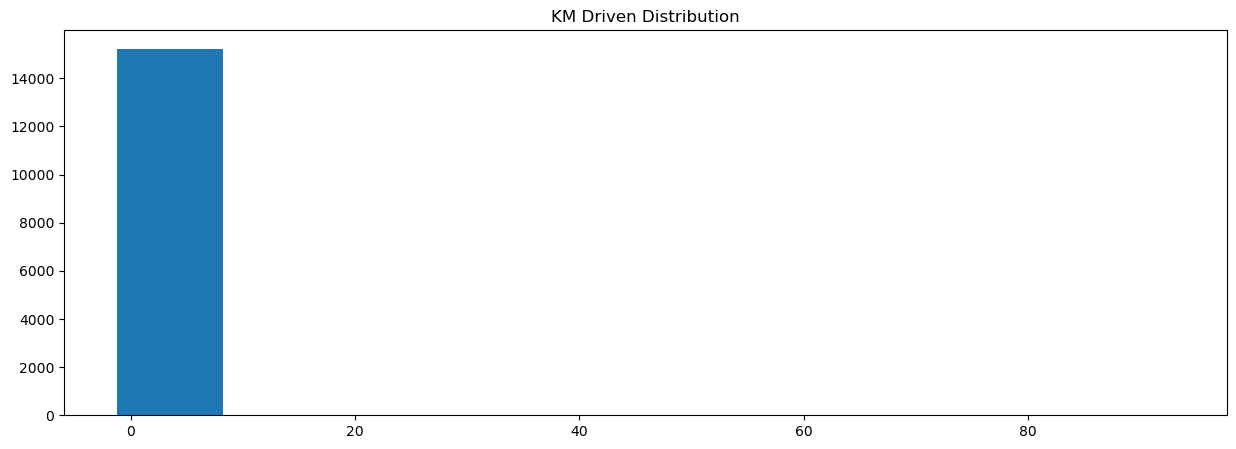

In [80]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()  


original_seats = df['seats'].copy()
original_vehicle_age = df['vehicle_age'].copy()


numerical_cols = ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


df['seats'] = original_seats


print("\nScaling Results:")
for col in numerical_cols:
    print(f"\n{col} statistics:")
    print(df[col].describe())



plt.figure(figsize=(15,5))
plt.subplot(111)
plt.hist(df['km_driven'])
plt.title('KM Driven Distribution')





Text(0.5, 1.0, 'Mileage Distribution')

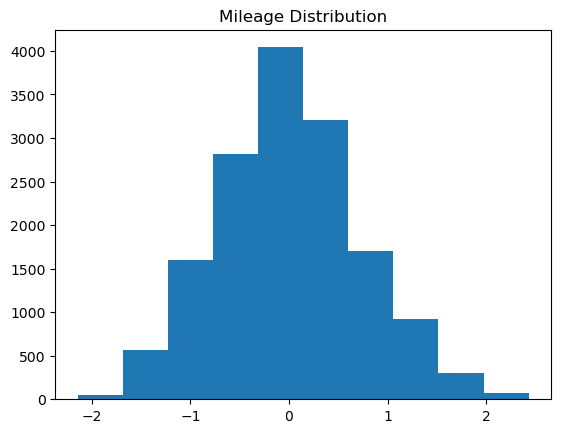

In [81]:
plt.subplot()
plt.hist(df['mileage'])
plt.title('Mileage Distribution')

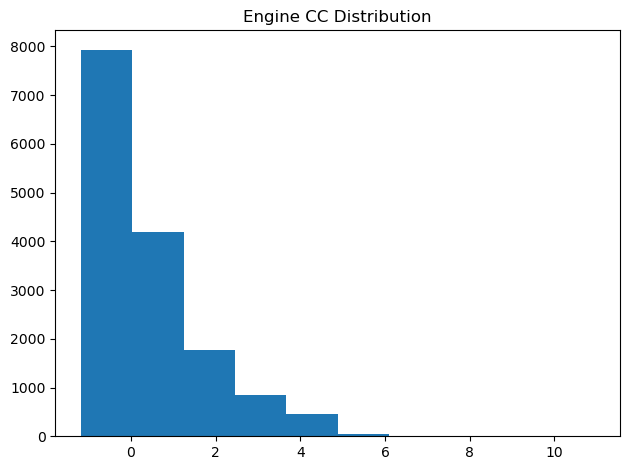

In [82]:
plt.subplot()
plt.hist(df['engine'])
plt.title('Engine CC Distribution')
plt.tight_layout()
plt.show()

In [83]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

In [84]:
df = df.drop(['car_name', 'brand', 'model'], axis=1)

df = pd.get_dummies(df, columns=['seller_type', 'fuel_type', 'transmission_type'], drop_first=True)



In [85]:
X = df.drop('selling_price', axis=1)
y = df['selling_price']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

lr_mse = mean_squared_error(y_test, y_pred_lr)
lr_r2 = r2_score(y_test, y_pred_lr)

rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

evaluation_results = {
    "Linear Regression": {"MSE": lr_mse, "R2 Score": lr_r2},
    "Random Forest Regressor": {"MSE": rf_mse, "R2 Score": rf_r2},
}

evaluation_results


{'Linear Regression': {'MSE': 0.061666605629822395,
  'R2 Score': 0.8576343882340824},
 'Random Forest Regressor': {'MSE': 0.032652855086464455,
  'R2 Score': 0.9246165141925656}}

In [86]:
from sklearn.metrics import mean_absolute_error
import numpy as np


lr_mae = mean_absolute_error(y_test, y_pred_lr)
lr_rmse = np.sqrt(lr_mse)


rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_rmse = np.sqrt(rf_mse)


feature_importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)


evaluation_results_full = {
    "Linear Regression": {
        "MAE": lr_mae,
        "MSE": lr_mse,
        "RMSE": lr_rmse,
        "R2 Score": lr_r2
    },
    "Random Forest Regressor": {
        "MAE": rf_mae,
        "MSE": rf_mse,
        "RMSE": rf_rmse,
        "R2 Score": rf_r2
    },
    "Feature Importances (Random Forest)": feature_importance_df.to_dict(orient='records')
}

evaluation_results_full


{'Linear Regression': {'MAE': 0.18920255097210148,
  'MSE': 0.061666605629822395,
  'RMSE': 0.2483276175334157,
  'R2 Score': 0.8576343882340824},
 'Random Forest Regressor': {'MAE': 0.13416019914060826,
  'MSE': 0.032652855086464455,
  'RMSE': 0.18070101019768664,
  'R2 Score': 0.9246165141925656},
 'Feature Importances (Random Forest)': [{'Feature': 'max_power',
   'Importance': 0.5936163137226212},
  {'Feature': 'vehicle_age', 'Importance': 0.2565394562337155},
  {'Feature': 'engine', 'Importance': 0.0647344369708267},
  {'Feature': 'km_driven', 'Importance': 0.037278989615585276},
  {'Feature': 'mileage', 'Importance': 0.027489454166820013},
  {'Feature': 'seller_type_1', 'Importance': 0.005421517224989747},
  {'Feature': 'seats', 'Importance': 0.0051640125330240216},
  {'Feature': 'transmission_type_1', 'Importance': 0.004651006471070588},
  {'Feature': 'fuel_type_1', 'Importance': 0.0034941175364684926},
  {'Feature': 'fuel_type_4', 'Importance': 0.0014210363820637106},
  {'Featu